# Averaged 5-year maximum

Assessment of model averaged 5-year maximum (minimum for Tasmin) over the 2000-2019 period.

(Bias corrected data for the period 2000-2019 was produced by training on data from the 1980-1999 period.)

In [71]:
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs

sys.path.append('/g/data/xv83/users/at2708/bias_adjustment/evaluation/npcp/results')
import utils

In [72]:
def calc_5year_m(da, var):
    """Calculate the averaged 5-year maximum (minimum for Tasmin)"""
    
    if var == 'pr' or var == 'tasmax':
        mode = 'maximum'
        y5_m = da.resample(time='5Y').max(dim='time')
    else:
        mode = 'minimum'
        y5_m = da.resample(time='5Y').min(dim='time')        
    y5_m_mean = y5_m.mean(dim='time')  
    return y5_m_mean, mode

In [73]:
def get_data(var, rcm):
    """Get data needed for the evaluation"""

    assert rcm in ['BOM-BARPA-R', 'UQ-DES-CCAM-2105']
    
    da_obs = utils.get_npcp_data(
        var,
        'observations',
        'AGCD',
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )   
    da_gcm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        'GCM',
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_raw = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_ecdfm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-historical',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    # TODO: Add additional bias correction methods as data becomes available 

    return da_obs, da_gcm, da_rcm_raw, da_rcm_ecdfm

In [74]:
def plot_mean_bias(ax, da_obs, da_model, var, cmap, levels, model_name, mode):
    """Plot the mean bias for a particular model"""
    
    y5_m_mean_obs, _ = calc_5year_m(da_obs, var)  
    y5_m_mean_model, _ = calc_5year_m(da_model, var)

    bias = y5_m_mean_model - y5_m_mean_obs
        
    units = 'mm/day' if var == 'pr' else da_model.attrs['units']
    bias.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels=levels,
        extend='both',
        cbar_kwargs={'label': units},
    )
    ax.set_title(model_name)
    ax.coastlines()


In [75]:
def plot_comparison(var, rcm, cmap, levels):
    """Plot the complete comparison"""

    da_obs, da_gcm, da_rcm_raw, da_rcm_ecdfm = get_data(var, rcm)
    _, mode = calc_5year_m(da_obs, var) # get mode "maximum" or "minimum"
    
    fig = plt.figure(figsize=[24, 6])
    ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax1, da_obs, da_gcm, var, cmap, levels, 'CSIRO-ACCESS-ESM1-5', mode
    )
    ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax2, da_obs, da_rcm_raw, var, cmap, levels, f'{rcm} (raw)', mode
    )
    ax3 = fig.add_subplot(133, projection=ccrs.PlateCarree())
    plot_mean_bias(
        ax3, da_obs, da_rcm_ecdfm, var, cmap, levels, f'{rcm} (ecdfm)', mode
    )
    long_name = da_rcm_raw.attrs['long_name']
    plt.suptitle('Averaged 5-year '+ mode + f' bias (model minus obs) in the 2000-2019 {long_name}')
    plt.show()

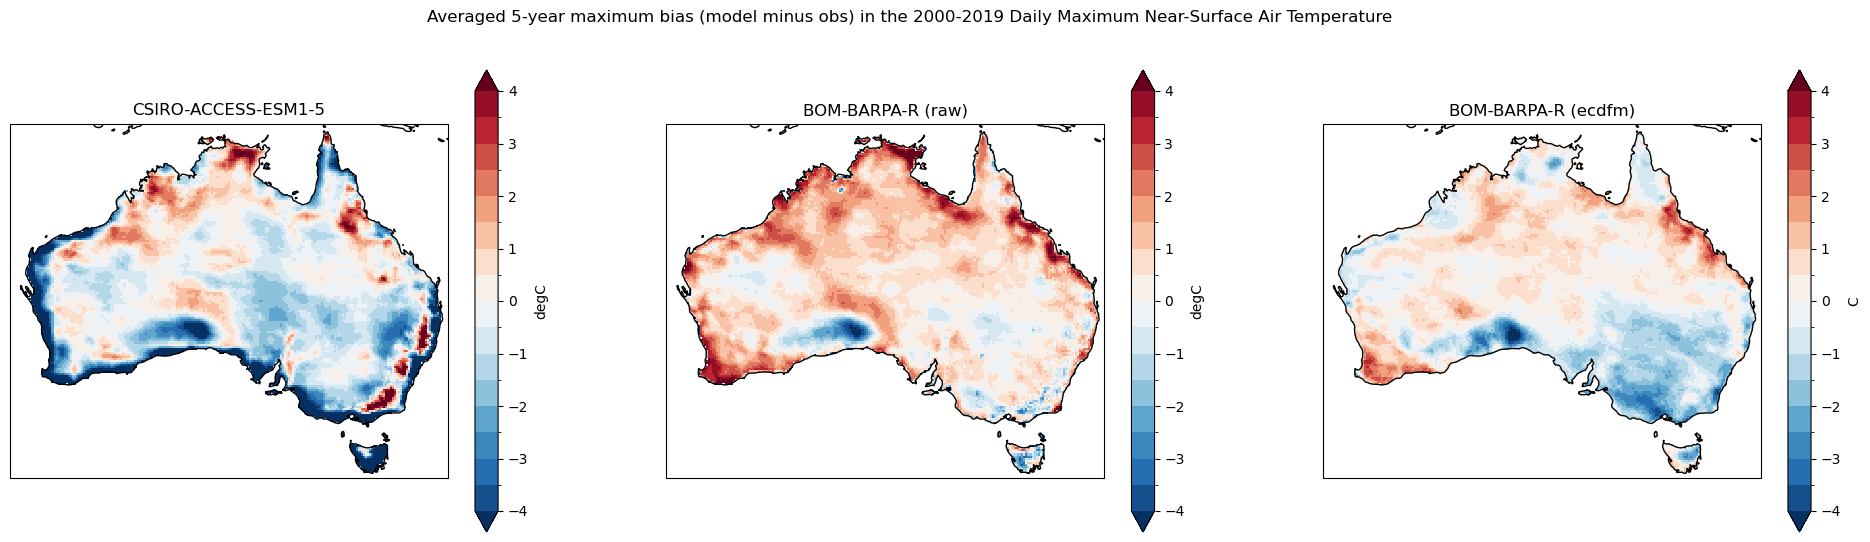

In [76]:
plot_comparison('tasmax', 'BOM-BARPA-R', 'RdBu_r', np.arange(-4, 4.01, 0.5))

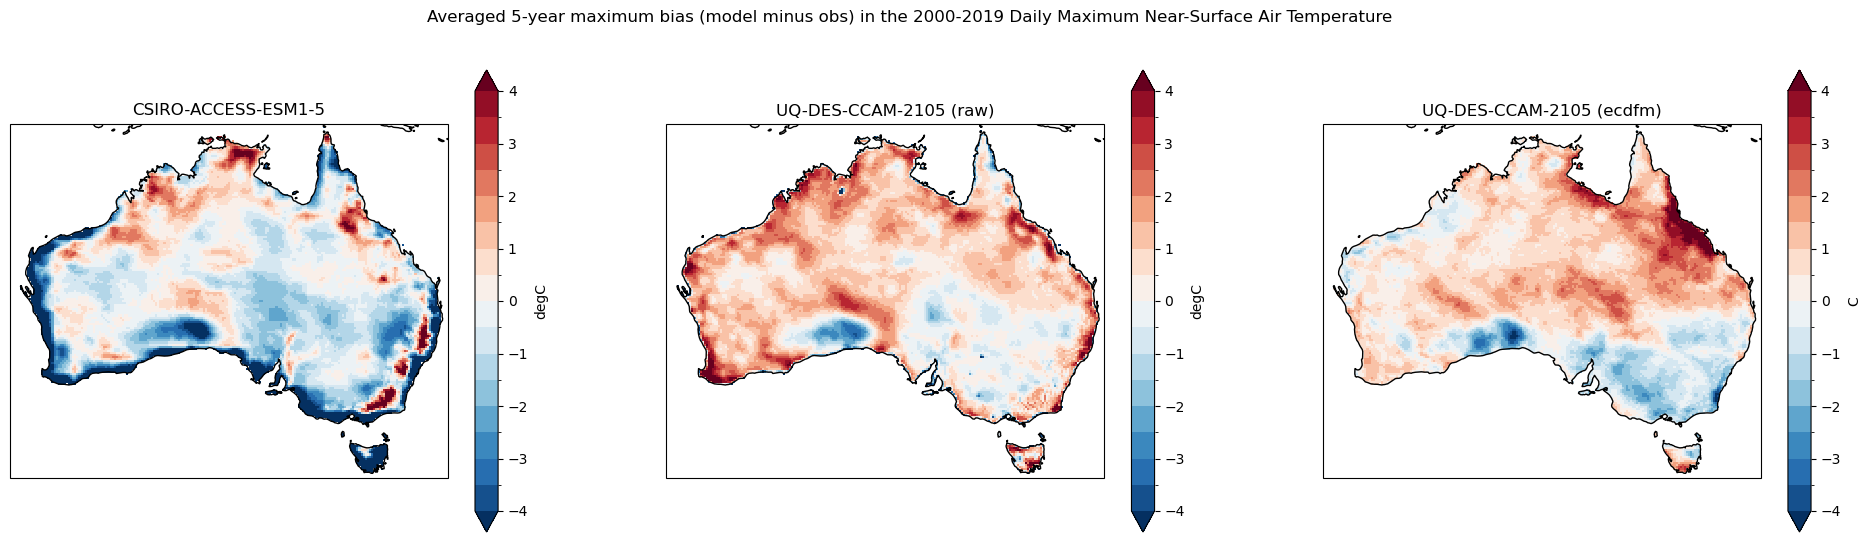

In [77]:
plot_comparison('tasmax', 'UQ-DES-CCAM-2105', 'RdBu_r', np.arange(-4, 4.01, 0.5))

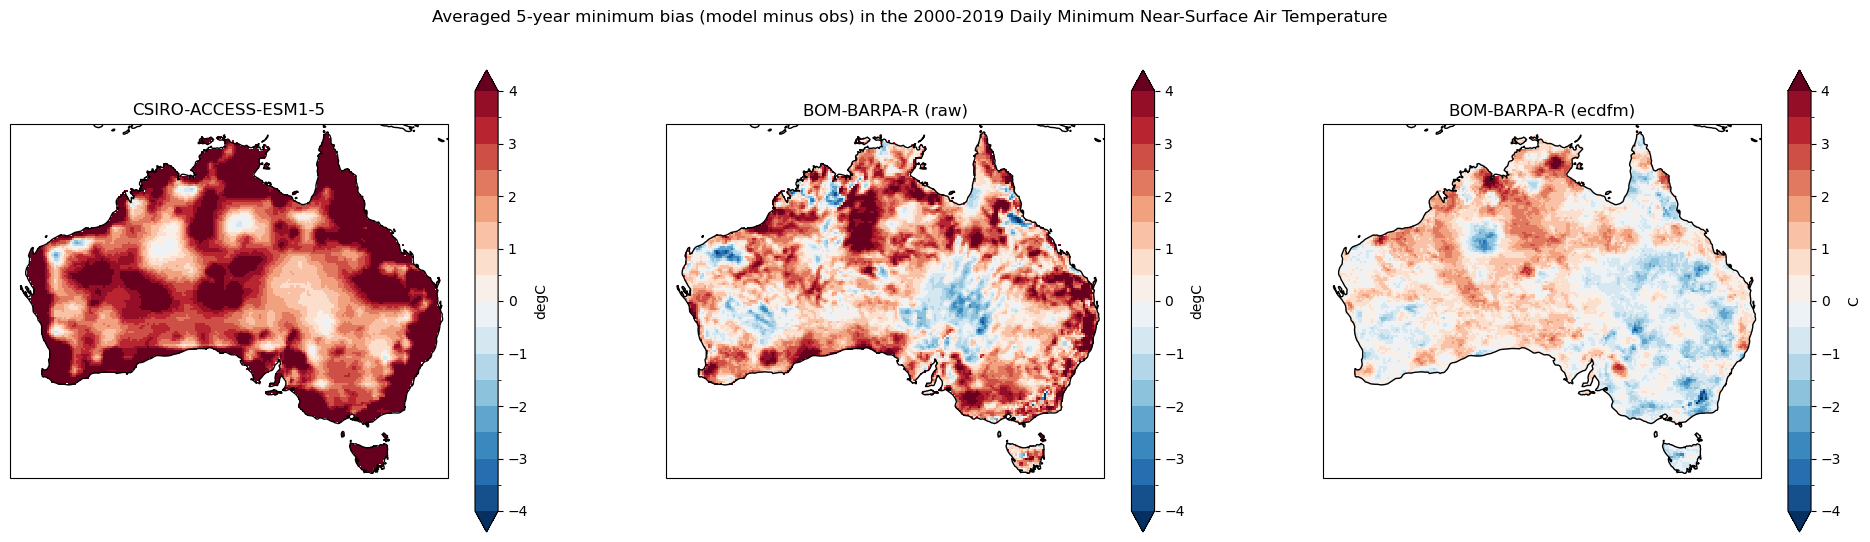

In [78]:
plot_comparison('tasmin', 'BOM-BARPA-R', 'RdBu_r', np.arange(-4, 4.01, 0.5))

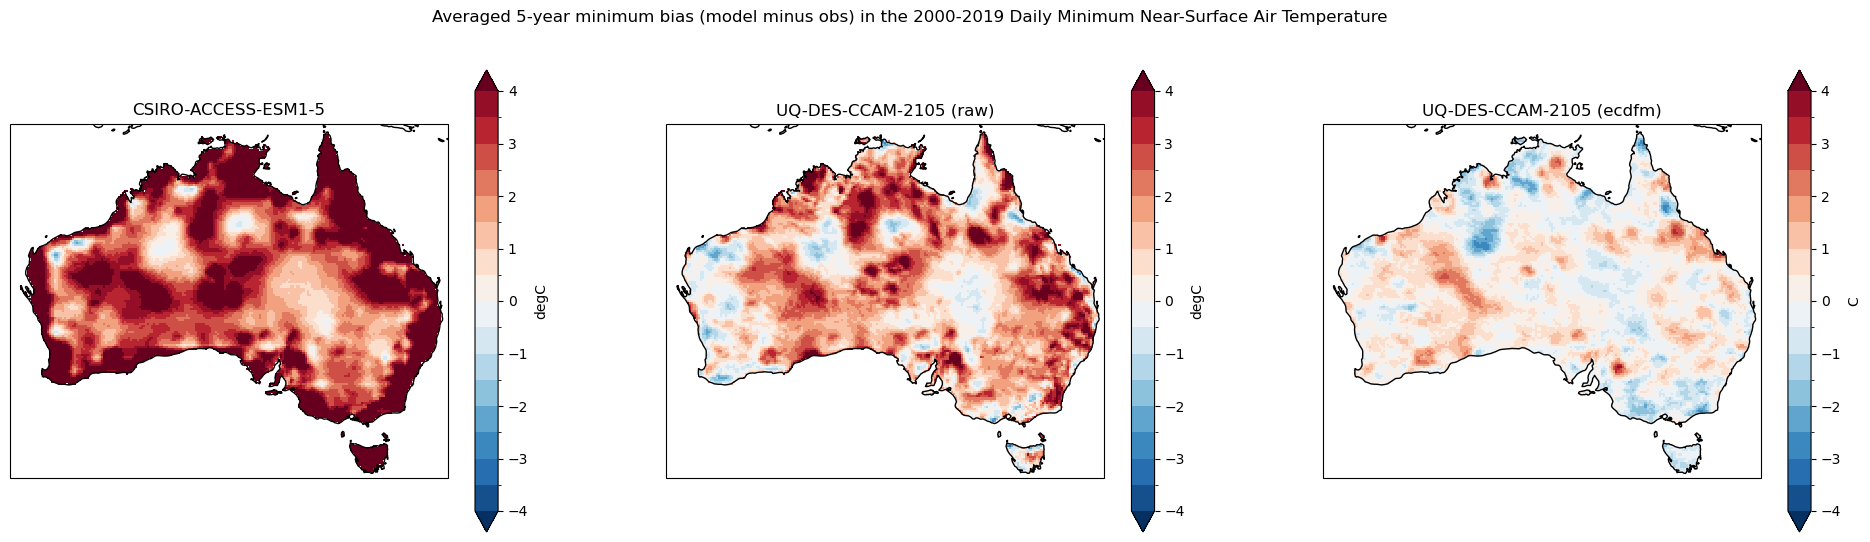

In [79]:
plot_comparison('tasmin', 'UQ-DES-CCAM-2105', 'RdBu_r', np.arange(-4, 4.01, 0.5))

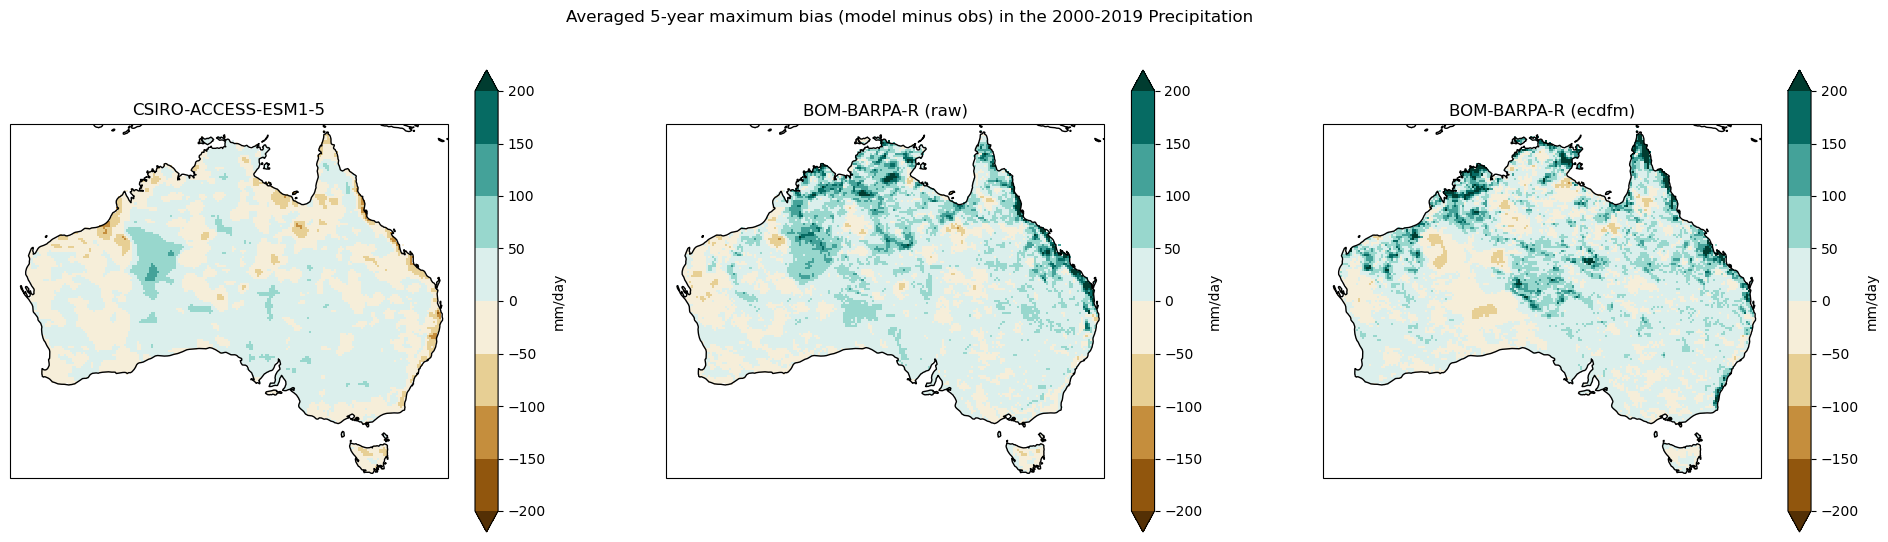

In [86]:
plot_comparison('pr', 'BOM-BARPA-R', 'BrBG', np.arange(-200, 200.1, 50))

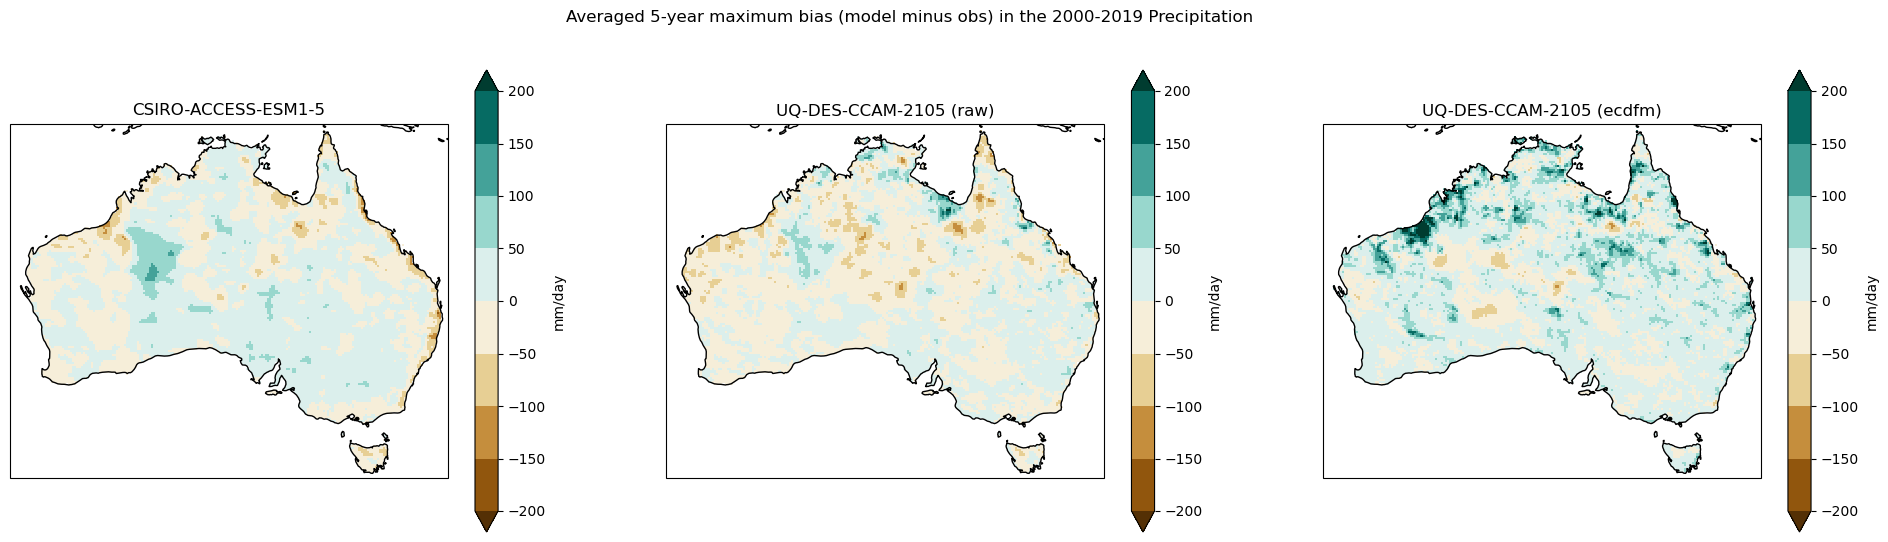

In [87]:
plot_comparison('pr', 'UQ-DES-CCAM-2105', 'BrBG', np.arange(-200, 200.1, 50))